## Backtracking

https://www.geeksforgeeks.org/backtracking-algorithms/

https://www.youtube.com/playlist?list=PLqM7alHXFySFbuucq7lC8ecRoWZxq1qS5

### 1. Feladat - Labirintus

[9][1] - bejárat </br>
5 - kijárat </br>
0 - út </br>
1 - helyes út </br>
2 - helytelen út </br>
9 - fal </br>

In [42]:
#include <stdio.h>
#include <stdbool.h>

#define N 10

int lab[N][N] = { { 9, 9, 9, 9, 9, 9, 9, 9, 9, 9 },
                    { 9, 0, 0, 9, 0, 9, 0, 9, 0, 5 },
                    { 9, 0, 9, 9, 0, 9, 0, 9, 0, 9 },
                    { 9, 0, 0, 0, 0, 9, 0, 0, 0, 9 },
                    { 9, 9, 0, 9, 9, 9, 9, 9, 0, 9 },
                    { 9, 0, 0, 0, 0, 0, 0, 9, 0, 9 },
                    { 9, 0, 9, 9, 9, 0, 9, 0, 0, 9 },
                    { 9, 0, 0, 0, 9, 0, 0, 0, 9, 9 },
                    { 9, 0, 9, 0, 9, 0, 9, 0, 0, 9 },
                    { 9, 0, 9, 9, 9, 9, 9, 9, 9, 9 } };


int kesz = 0;

void kiiras() {
    for (int i=0; i<N; i++) {
        for (int j=0; j<N; j++) {
            printf("%2d", lab[i][j]);
        }
        printf("\n");
    }
    printf("\n");
}

void lepes(int sor, int oszlop) {
    // eljutottunk-e a celig
    if (lab[sor][oszlop]==5) {
        kesz = 1;
    }
    // odalepunk a mezore
    lab[sor][oszlop] = 1;
    // ha nincs megoldas, akkor megrobalunk tovabblepni....
    if (kesz==0 && sor>0 && (lab[sor-1][oszlop]==0 || lab[sor-1][oszlop]==5)) {
        lepes(sor-1,oszlop); // felfele lepunk tovabb
    }
    if (kesz==0 && oszlop<N-1 && (lab[sor][oszlop+1]==0 || lab[sor][oszlop+1]==5)) {
        lepes(sor,oszlop+1); // jobbra lepunk tovabb
    }
    if (kesz==0 && sor<N-1 && (lab[sor+1][oszlop]==0 || lab[sor+1][oszlop]==5)) {
        lepes(sor+1,oszlop); // lefele lepunk tovabb
    }
    if (kesz==0 && oszlop>0 && (lab[sor][oszlop-1]==0 || lab[sor][oszlop-1]==5)) {
        lepes(sor,oszlop-1); // balra lepunk tovabb
    }
    // ha nem jutottunk megoldashoz, akkor visszlepunk
    if (kesz==0) {
        lab[sor][oszlop] = 2;
    }
}


int main() {    
    kiiras();
    lepes(N-1,1);
    kiiras();
}

 9 9 9 9 9 9 9 9 9 9
 9 0 0 9 0 9 0 9 0 5
 9 0 9 9 0 9 0 9 0 9
 9 0 0 0 0 9 0 0 0 9
 9 9 0 9 9 9 9 9 0 9
 9 0 0 0 0 0 0 9 0 9
 9 0 9 9 9 0 9 0 0 9
 9 0 0 0 9 0 0 0 9 9
 9 0 9 0 9 0 9 0 0 9
 9 0 9 9 9 9 9 9 9 9

 9 9 9 9 9 9 9 9 9 9
 9 2 2 9 2 9 0 9 1 1
 9 2 9 9 2 9 0 9 1 9
 9 2 2 2 2 9 0 0 1 9
 9 9 2 9 9 9 9 9 1 9
 9 1 1 1 1 1 2 9 1 9
 9 1 9 9 9 1 9 1 1 9
 9 1 0 0 9 1 1 1 9 9
 9 1 9 0 9 0 9 0 0 9
 9 1 9 9 9 9 9 9 9 9



### 1. Feladat bővítés

<ul>
    <li>A célbaérés ellenőrését végezze boolean típusú igaz/hamis értékekkel!</li>
    <li>A labirintus kezelését és kirajzolását valósítsa meg karakterek segítségével!</li>
    <li>Készítsen függvényt, ami megkeresi a labirintus bejáratát és onnan indítja az algoritmust!</li>
</ul>

### 2. Feladat - 8 királynő

Hogyan lehet elhelyezni a 8x8-as sakktáblán 8 darab királynőt úgy, hogy azok ne üssék egymást? A királynő tud mozogni pozíciójának megfelelő sorban (vízszintesen), oszlopban (függőlegese) és mindkét átlóban a tábla teljes területén.

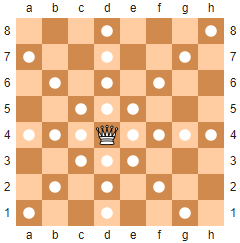

Általánosítva: NxN-es táblán helyezzen el N darab királynőt.

Megoldás: Megpróbáljuk lerakni az első sorba, majd a másodikba, ... Ha valahol zsákutcába jutunk, visszalépünk az előző sorra es ott máshova tesszük.

In [1]:
#include <stdio.h>

#define N 8 
int sakktabla[N][N];  // 0 = ures mezo, 1 = kiralyno van a mezon


void kiiras() {
	for (int i=0; i<N; i++) {
		for (int j=0; j<N; j++) {
			printf("%d ", sakktabla[i][j]);
		}
		printf("\n");
	}
	printf("\n");
	// getchar();
}

// megallapitja lerakhato-e a kiralyno a tablara, a megadott [sor][oszlop]-ra
int leteheto(int sor, int oszlop) {
	int leteheto = 1;
	for (int i=0; i<sor; i++) {
		// van-e mar ebben az oszlopban kiralyno valahol felette?
		if (sakktabla[i][oszlop]==1) {
			leteheto = 0;
		}
		// az "\" atloban van-e mar kiralyno felette?
		if (oszlop-sor+i>=0 && sakktabla[i][oszlop-sor+i]==1) {
			leteheto = 0;
		}
		// az "/" atloban van-e mar kiralyno felette?
		if (oszlop+sor-i<N && sakktabla[i][oszlop+sor-i]==1) {
			leteheto = 0;
		}
	}
	return leteheto;
}

// letesz egy kiralynot az adott sorba valamelyik oszlopba (0..N-1),
// majd meghivja onmagat a kovetkezo sorra...
int letesz(int sor) {
 	int oszlop = 0; // 0. oszloptol kezdjuk el probalni a lerakni
 	int kesz = 0; // van megoldas? (0=nincs, 1=van)
 	do {
 		// melyik oszlopba rakhato le?
 		while (oszlop<N && leteheto(sor,oszlop)==0) {
			oszlop++;
		}
		// ha talaltunk neki helyet, lerakjuk...
		if (oszlop<N){
			sakktabla[sor][oszlop] = 1;
			printf("Kiralyno elhelyezese a(z) %d. sorba...\n", sor+1);
			kiiras();
			// majd ha van meg tovabbi sor...
			if (sor<N-1) {
				// probalkozunk a kovetkezo sorral
				kesz = letesz(sor+1);
			} else {
				// utolso sorba is leraktuk
				kesz = 1;
			}
			// ha nincs meg a megoldas, toroljuk az aktualis oszlopban
			// es a kovetkezo oszloptol probaljuk tovabb...
			if (kesz == 0) {
				sakktabla[sor][oszlop] = 0;
				oszlop++;
			}
		}
 	} while (oszlop<N && kesz==0);
 	return kesz;
}

int main() {
	// kinullazzuk a sakktablat
	for (int i=0; i<N; i++) {
		for (int j=0; j<N; j++) {
			sakktabla[i][j] = 0;
		}
	}	
	int k = letesz(0);
	if (k==0) {
		printf("Nincs megoldas!\n");
	};
}


Kiralyno elhelyezese a(z) 1. sorba...
1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

Kiralyno elhelyezese a(z) 2. sorba...
1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

Kiralyno elhelyezese a(z) 3. sorba...
1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

Kiralyno elhelyezese a(z) 4. sorba...
1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

Kiralyno elhelyezese a(z) 5. sorba...
1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 

Kiralyno elhelyezese a(z) 5. sorba...
1 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 
0 

### 3. Feladat - Sudoku

Készítsen programot, ami képes kirajzolni és megoldani egy Sudoku rejtvényt! Bővítse a megoldást úgy, hogy lehessen fájlból beolvasni feladatot és mentse ki a megoldást fájlba.

<b>Szabályok:</b> Bármelyik oszlopban, sorban, vagy 3*3-as szekcióban pontosan egyszer szerepelhet minden szám.
```
 -------------------------
 | 5 3 0 | 0 7 6 | 0 0 0 |
 | 6 0 0 | 1 9 5 | 0 0 0 |
 | 0 9 8 | 0 0 0 | 0 6 0 |
 -------------------------
 | 8 0 0 | 0 6 0 | 0 0 3 |
 | 4 0 0 | 8 0 3 | 0 0 1 |
 | 9 0 0 | 0 2 0 | 0 0 6 |
 -------------------------
 | 0 6 0 | 0 0 0 | 2 8 0 |
 | 0 0 0 | 4 1 9 | 0 0 5 |
 | 0 0 0 | 0 8 0 | 0 7 9 |
 -------------------------
```

In [2]:
#include <stdio.h>
#include <stdbool.h>

int sudoku[9][9] = { { 5, 3, 0, 0, 7, 6, 0, 0, 0 },
                     { 6, 0, 0, 1, 9, 5, 0, 0, 0 },
                     { 0, 9, 8, 0, 0, 0, 0, 6, 0 },
                     { 8, 0, 0, 0, 6, 0, 0, 0, 3 },
                     { 4, 0, 0, 8, 0, 3, 0, 0, 1 },
                     { 9, 0, 0, 0, 2, 0, 0, 0, 6 },
                     { 0, 6, 0, 0, 0, 0, 2, 8, 0 },
                     { 0, 0, 0, 4, 1, 9, 0, 0, 5 },
                     { 0, 0, 0, 0, 8, 0, 0, 7, 9 } };    

void output_sudoku() {    
    for (int i=0; i<9; i++) {
        for (int j=0; j<9; j++) {            
            printf("%2d", sudoku[i][j]);            
        }
    printf("\n");
    }
}    
  

int main() {    
    //bool solved = false;
    output_sudoku();   
}

 5 3 0 0 7 6 0 0 0
 6 0 0 1 9 5 0 0 0
 0 9 8 0 0 0 0 6 0
 8 0 0 0 6 0 0 0 3
 4 0 0 8 0 3 0 0 1
 9 0 0 0 2 0 0 0 6
 0 6 0 0 0 0 2 8 0
 0 0 0 4 1 9 0 0 5
 0 0 0 0 8 0 0 7 9
